In [7]:
!pip install pywavelets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 2.2 MB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/Users/nielsescarfail/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [58]:
from once_for_all.run_manager.dataset import AudioProcessor, AudioGenerator
from torchaudio.transforms import MFCC, MelSpectrogram

import matplotlib.pyplot as plt
import numpy as np
import torch
import os

import librosa
import matplotlib.pyplot as plt
import requests
from IPython.display import Audio, display

In [59]:
def plot_spectrogram(spec, title=None, ylabel="freq_bin", aspect="auto", xmax=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(spec), origin="lower", aspect=aspect)
    if xmax:
        axs.set_xlim((0, xmax))
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

In [60]:
audio_processor = AudioProcessor(feature_extraction_method = "mfcc")
dataset = AudioGenerator(mode='training', audio_processor=audio_processor)

sample, labels = dataset[0]
print(sample.shape)
sample_rate = 16000

torch.Size([16000])


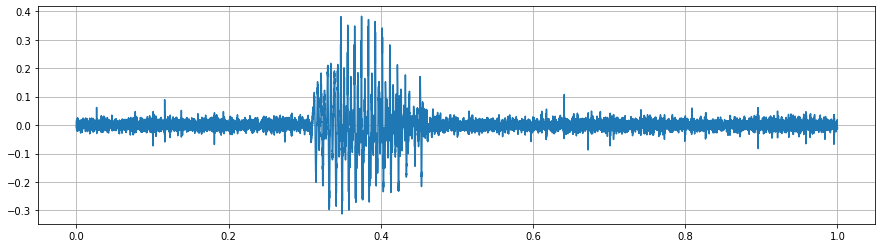

In [61]:
plt.figure(figsize=(15,4))
plt.plot(np.linspace(0, len(sample) / audio_processor.desired_samples, num=len(sample)), sample)
plt.grid(True)

In [62]:
backupparams = [(40, 5), (5, 5) ,(5, 10), (5, 20), (5, 30), (5, 40), (5, 60), (5, 80),
            (10, 5), (10, 10), (10, 20), (10, 30), (10, 40), (10, 60), (10, 80),
          (20, 5), (20, 10), (20, 20), (20, 30), (20, 40), (20, 60), (20, 80),
          (30, 5), (30, 10), (30, 20), (30, 30), (30, 40), (30, 60), (30, 80),
         (40, 5), (40, 10), (40, 20), (40, 30), (40, 40), (40, 60), (40, 80)]  

### OUR DATASET

### MFCC

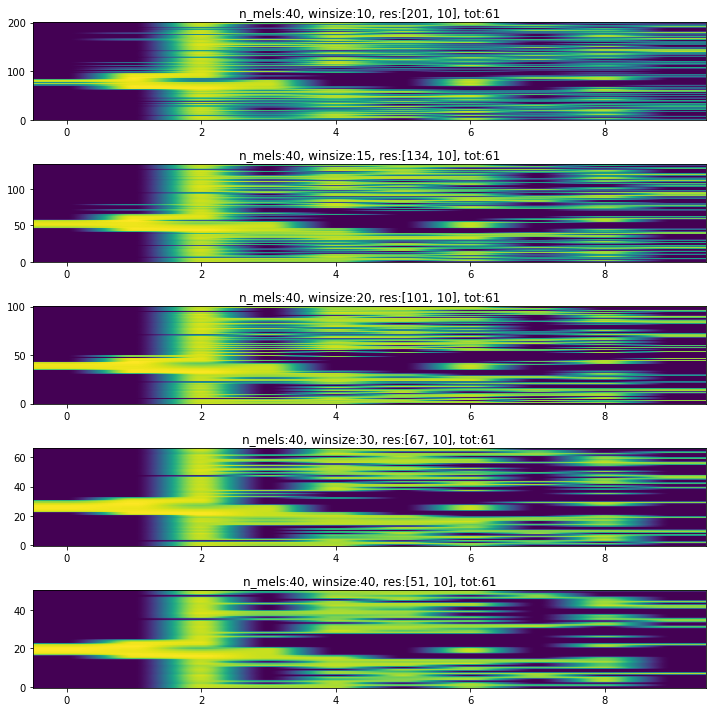

In [68]:
fig=plt.figure(figsize=(10,10))
axes = []
cols = 1
rows = 5

ft_extr_params_list = [(40, 10), (40, 15), (40, 20), (40, 30), (40, 40)]


for i, (n_mfcc, win_size) in enumerate(ft_extr_params_list):
    # print("n_mfcc %i, win_size %i" % (n_mfcc, win_size))
    window_stride_ms = win_size/2
    win_length = int(sample_rate * win_size / 1000)
    hop_length = int(sample_rate * window_stride_ms / 1000)
    # print("win_size_ms %i, win_length %i, hop_length %i" % (win_size, win_length, hop_length))
    melkwargs = {'n_fft': 1024, 'win_length': win_length, 'hop_length': hop_length,
            'f_min': 20, 'f_max': 4000, 'n_mels': n_mfcc}

    mfcc_transformation = MFCC(
                    n_mfcc=10,
                    sample_rate=audio_processor.desired_samples, melkwargs=melkwargs, log_mels=True,
                    norm='ortho')

    mfcc_sample = mfcc_transformation(sample).transpose(0,-1)
    title = "n_mels:%i, winsize:%i, res:%s, tot:%i" % (n_mfcc, win_size, str(list(mfcc_sample.shape)), list(mel_sample.shape)[0] + list(mel_sample.shape)[1])

    axes.append( fig.add_subplot(rows, cols, i+1) )
    axes[-1].set_title(title)  
    
    plt.imshow(librosa.power_to_db(mfcc_sample), origin="lower", aspect="auto")
    

plt.tight_layout()
plt.show()
    

### Mel spectrogram features

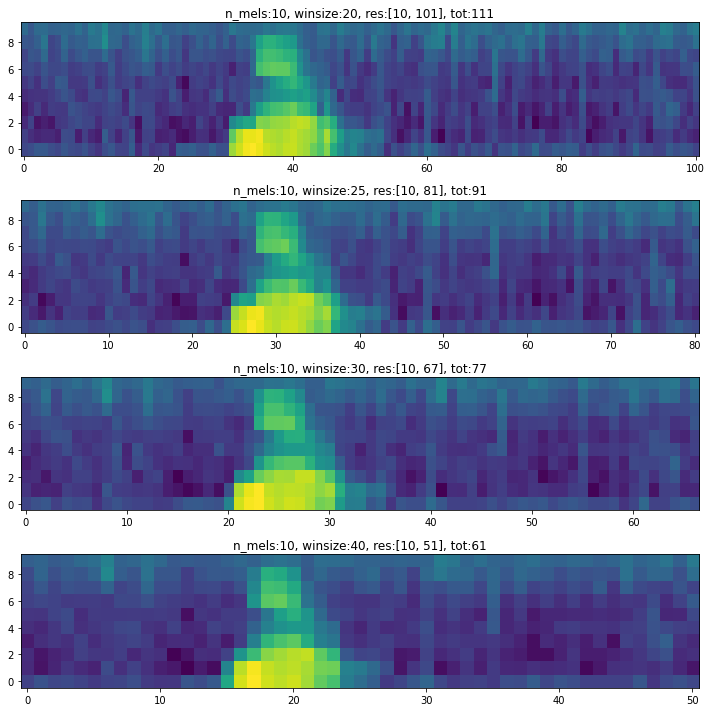

In [64]:
fig=plt.figure(figsize=(10,10))
axes = []
cols = 1
rows = 4

ft_extr_params_list = [(10, 20), (10, 25), (10, 30), (10, 40),]
                      # (80, 20), (80, 25), (80, 30), (80, 40)]


for i, (n_mels, win_size) in enumerate(ft_extr_params_list):
    # print("nfft %i, win_size %i" % (n_fft, win_size))
    window_stride_ms = win_size/2
    win_length = int(sample_rate * win_size / 1000)
    hop_length = int(sample_rate * window_stride_ms / 1000)
    # print("win_length %i, hop_length %i" % (win_length, hop_length))
    melspect_transformation = MelSpectrogram(
                    sample_rate=audio_processor.desired_samples,
                    n_fft=2048, win_length=win_length,
                    hop_length=hop_length, f_min=20, f_max=4000, n_mels=n_mels, center=True, normalized=True
                )
    mel_sample = melspect_transformation(sample)
    title = "n_mels:%i, winsize:%i, res:%s, tot:%i" % (n_mels, win_size, str(list(mel_sample.shape)), list(mel_sample.shape)[0] + list(mel_sample.shape)[1])

    axes.append( fig.add_subplot(rows, cols, i+1) )
    axes[-1].set_title(title)  
    
    plt.imshow(librosa.power_to_db(mel_sample), origin="lower", aspect="auto")
    

plt.tight_layout()
plt.show()
    

### Linear STFT

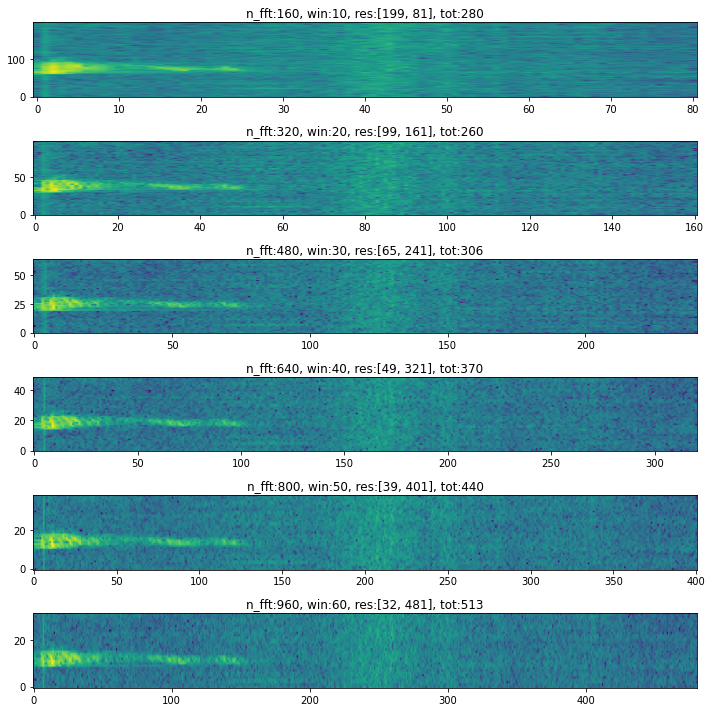

In [65]:
fig=plt.figure(figsize=(10,10))
axes = []
cols = 1
rows = 6

ft_extr_params_list = [(1, 10), (1, 20), (1, 30), (1, 40), (1, 50), (1, 60)]

# n_fft is fixed to the minimum for the given win_size

for i, (n_fft, win_size) in enumerate(ft_extr_params_list):
    # print("n_fft %i, win_size %i" % (n_fft, win_size))
    window_stride_ms = win_size/2
    win_length = int(sample_rate * win_size / 1000)
    n_fft = win_length
    hop_length = int(sample_rate * window_stride_ms / 1000)
    # print("win_length %i, hop_length %i" % (win_length, hop_length))
    stft_sample = torch.stft(sample, n_fft=n_fft, hop_length=hop_length, win_length=win_length, center=False)
    
    out_real = stft_sample[ :, :, 0]
    out_imag = stft_sample[ :, :, 1]
    stft_sample = np.abs(out_real **2 + out_imag**2).transpose(0,-1)
    title = "n_fft:%i, win:%i, res:%s, tot:%i" % (n_fft, win_size, str(list(stft_sample.shape)), list(stft_sample.shape)[0] + list(stft_sample.shape)[1])

    axes.append( fig.add_subplot(rows, cols, i+1) )
    axes[-1].set_title(title)  
    
    plt.imshow(librosa.power_to_db(stft_sample), origin="lower", aspect="auto")
    

plt.tight_layout()
plt.show()
    

### LPCC

In [66]:
def lpc2cep(a, nout=0):
    """
    convert LPC coefficients directly to cepstral values.
     - convert the LPC 'a' coefficients in each column of lpcs into frames of cepstra.
    Args:
        a  (array) : cepstral values.
        nout (int) : number of cepstra to produce
    Returns:
        array of LPC coefficients.
        Default size(lpcs, 1)
    """
    nin = a.shape[0]

    order = nin - 1

    if nout == 0:
        nout = order + 1

    cep = np.zeros((nout, 1))
    cep[0,:] = -np.log(a[0,:])

    norm_a = np.divide(a, np.add(np.tile(a[0,:], (nin, 1)), 1e-8))

    for n in range(1, nout):
        sum_var = 0
        for m in range(1, n):
            sum_var = np.add(
                sum_var,
                np.multiply(np.multiply((n - m), norm_a[m,:]),
                            cep[(n - m),:]))

        cep[n, :] = -np.add(norm_a[n, :], np.divide(sum_var, n))

    return cep

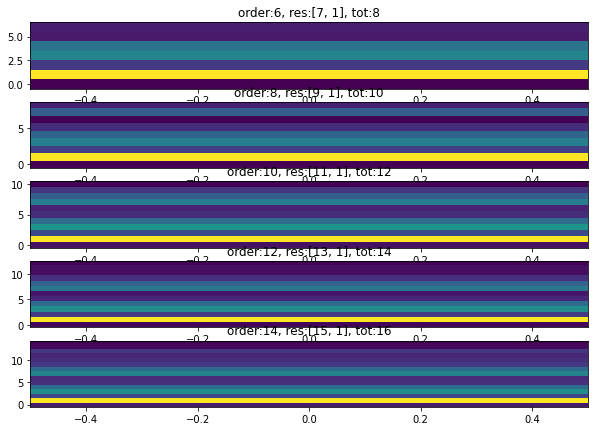

In [67]:
fig=plt.figure(figsize=(10,10))
axes = []
cols = 1
rows = 7

ft_extr_params_list = [6, 8, 10, 12, 14]
# init input vars
lifter = 0
normalize = False
    
# read wav 
fs = 16000

for i, order in enumerate(ft_extr_params_list):
    # compute lpcs
    lpcs = librosa.lpc(y=np.array(sample), order=order)
    lpccs = lpc2cep(a=lpcs[:, None]).transpose(0, -1)
    
    title = "order:%i, res:%s, tot:%i" % (order, str(list(lpccs.shape)), list(lpccs.shape)[0] + list(lpccs.shape)[1])
        
    axes.append(fig.add_subplot(rows, cols, i+1) )
    axes[-1].set_title(title)  
    
    plt.imshow(lpccs, origin="lower", aspect="auto")
    
        


# Testing other params / setups

### MFCC

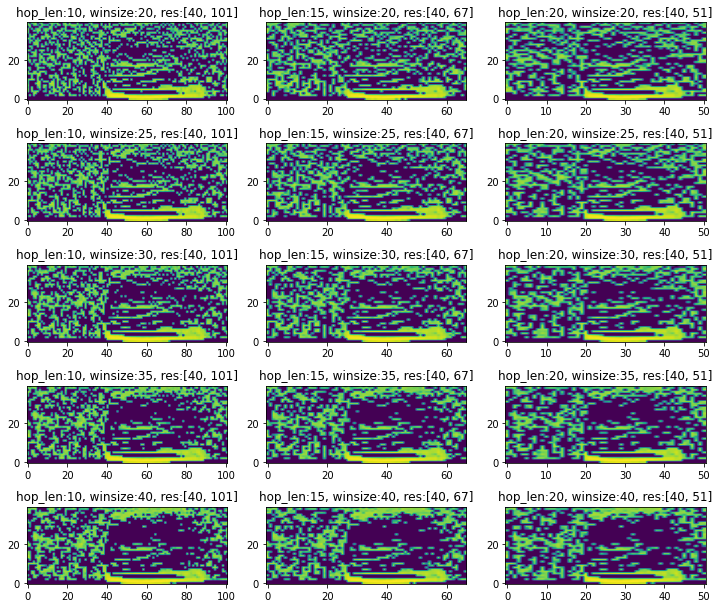

In [40]:
fig=plt.figure(figsize=(10,10))
axes = []
cols = 3
rows = 6

ft_extr_params_list = [(20, 10), (20, 15), (20, 20),
    (25, 10), (25, 15), (25, 20),
                      (30, 10), (30, 15), (30, 20),
                      (35, 10), (35, 15), (35, 20),
                      (40, 10), (40, 15), (40, 20)]


for i, (win_size, hop_len) in enumerate(ft_extr_params_list):
    # print("n_mfcc %i, win_size %i" % (n_mfcc, win_size))
    window_stride_ms = hop_len
    win_length = int(audio_processor.desired_samples * win_size / 1000)
    hop_length = int(audio_processor.desired_samples * window_stride_ms / 1000)
    melkwargs = {'n_fft': 1024, 'win_length': win_length,
                 'hop_length': hop_length,
                 'f_min': 20, 'f_max': 4000, 'n_mels': 80}  # this is resolution
    mfcc_transformation = MFCC(
        n_mfcc=40,  # this is crop
        sample_rate=audio_processor.desired_samples, melkwargs=melkwargs, log_mels=True,
        norm='ortho')
    
    mfcc_sample = mfcc_transformation(sample)# .transpose(0,-1)
    title = "hop_len:%i, winsize:%i, res:%s" % (hop_len, win_size, str(list(mfcc_sample.shape)))

    axes.append( fig.add_subplot(rows, cols, i+1) )
    axes[-1].set_title(title)  
    
    plt.imshow(librosa.power_to_db(mfcc_sample), origin="lower", aspect="auto")
    

plt.tight_layout()
plt.show()
    

win_length 160, hop_length 80
win_length 240, hop_length 120
win_length 320, hop_length 160
win_length 480, hop_length 240
win_length 640, hop_length 320
win_length 160, hop_length 80
win_length 240, hop_length 120
win_length 320, hop_length 160
win_length 480, hop_length 240
win_length 640, hop_length 320
win_length 160, hop_length 80
win_length 240, hop_length 120
win_length 320, hop_length 160
win_length 480, hop_length 240
win_length 640, hop_length 320


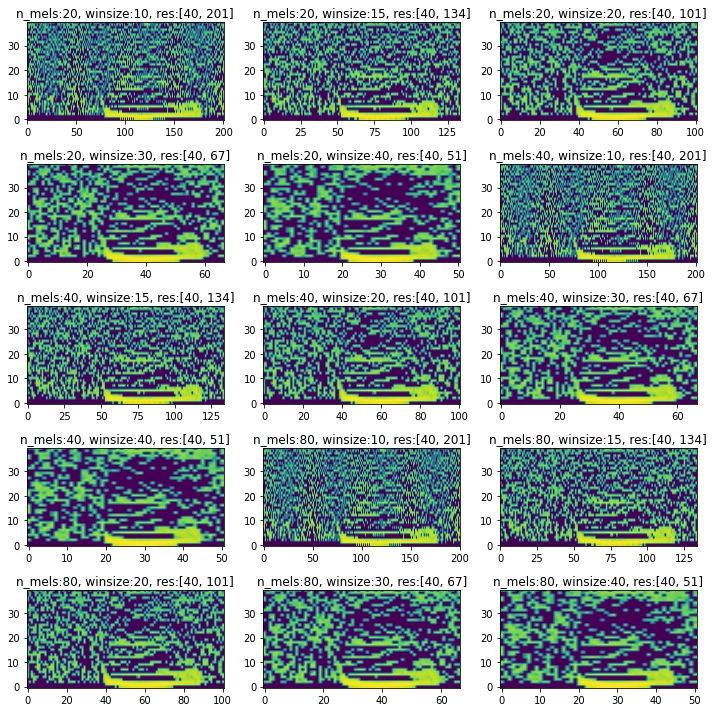

In [41]:
fig=plt.figure(figsize=(10,10))
axes = []
cols = 3
rows = 5

ft_extr_params_list = [ (20, 10), (20, 15), (20, 20), (20, 30), (20, 40),
                    (40, 10), (40, 15), (40, 20), (40, 30), (40, 40),
                      
                      (80, 10), (80, 15), (80, 20), (80, 30), (80, 40),]


for i, (n_mfcc, win_size) in enumerate(ft_extr_params_list):
    # print("n_mfcc %i, win_size %i" % (n_mfcc, win_size))
    window_stride_ms = win_size/2
    win_length = int(sample_rate * win_size / 1000)
    hop_length = int(sample_rate * window_stride_ms / 1000)
    print("win_length %i, hop_length %i" % (win_length, hop_length))
    melkwargs = {'n_fft': 1024, 'win_length': win_length, 'hop_length': hop_length,
            'f_min': 20, 'f_max': 4000, 'n_mels': 40}

    mfcc_transformation = MFCC(
                    n_mfcc=40,
                    sample_rate=audio_processor.desired_samples, melkwargs=melkwargs, log_mels=True,
                    norm='ortho')

    mfcc_sample = mfcc_transformation(sample)
    title = "n_mels:%i, winsize:%i, res:%s" % (n_mfcc, win_size, str(list(mfcc_sample.shape)))

    axes.append( fig.add_subplot(rows, cols, i+1) )
    axes[-1].set_title(title)  
    
    plt.imshow(librosa.power_to_db(mfcc_sample), origin="lower", aspect="auto")
    

plt.tight_layout()
plt.show()
    

### Mel spectrogram features

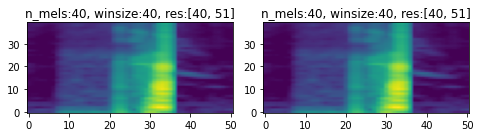

In [53]:
fig=plt.figure(figsize=(10,10))
axes = []
cols = 3
rows = 6

ft_extr_params_list = [(40, 10), (40, 40)]

for i, (n_mels, hop_length) in enumerate(ft_extr_params_list):
    # print("nfft %i, win_size %i" % (n_fft, win_size))
    window_stride_ms = win_size/2
    win_length = int(sample_rate * win_size / 1000)
    hop_length = int(sample_rate * window_stride_ms / 1000)
    # print("win_length %i, hop_length %i" % (win_length, hop_length))
    melspect_transformation = MelSpectrogram(
                    sample_rate=audio_processor.desired_samples,
                    n_fft=2048,
                    hop_length=hop_length, f_min=20, f_max=4000, n_mels=n_mels, center=True, normalized=True
                )
    mel_sample = melspect_transformation(sample)
    title = "n_mels:%i, winsize:%i, res:%s" % (n_mels, win_size, str(list(mel_sample.shape)))

    axes.append( fig.add_subplot(rows, cols, i+1) )
    axes[-1].set_title(title)  
    # print(mel_sample.shape)
    # print(librosa.power_to_db(mel_sample).shape)
    
    plt.imshow(librosa.power_to_db(mel_sample), origin="lower", aspect="auto")
    

plt.tight_layout()
plt.show()
    

(80, 101)


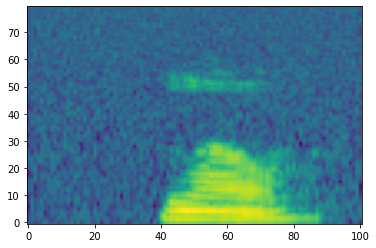

In [10]:
# Sanity check that indeed we understood the underlying pipeline

win_size = 20
n_mels = 80

window_stride_ms = win_size/2
win_length = int(sample_rate * win_size / 1000)
hop_length = int(sample_rate * window_stride_ms / 1000)

S = librosa.feature.melspectrogram(y=np.array(sample), sr=16000, n_fft=2048, win_length=win_length, hop_length=hop_length, n_mels=n_mels)
fft_windows = librosa.stft(np.array(sample), n_fft=2048,  win_length=win_length, hop_length=hop_length)
magnitude = np.abs(fft_windows)**2
mel = librosa.filters.mel(sr=16000, n_fft=2048, n_mels=n_mels)

assert (mel.dot(magnitude) == S).all()

print(S.shape)
plt.imshow(librosa.power_to_db(S), origin="lower", aspect="auto")

### Linear STFT

win_size 40, hop_size 10
win_length 40, hop_length 10
win_size 60, hop_size 10
win_length 60, hop_length 10
win_size 80, hop_size 10
win_length 80, hop_length 10
win_size 40, hop_size 20
win_length 40, hop_length 20
win_size 60, hop_size 20
win_length 60, hop_length 20


/Users/nielsescarfail/opt/anaconda3/lib/python3.8/site-packages/torch/functional.py:695: UserWarning: stft will soon require the return_complex parameter be given for real inputs, and will further require that return_complex=True in a future PyTorch release. (Triggered internally at  /Users/distiller/project/pytorch/aten/src/ATen/native/SpectralOps.cpp:798.)
  return _VF.stft(input, n_fft, hop_length, win_length, window,  # type: ignore[attr-defined]


win_size 80, hop_size 20
win_length 80, hop_length 20
win_size 40, hop_size 30
win_length 40, hop_length 30
win_size 60, hop_size 30
win_length 60, hop_length 30
win_size 80, hop_size 30
win_length 80, hop_length 30
win_size 40, hop_size 40
win_length 40, hop_length 40
win_size 60, hop_size 40
win_length 60, hop_length 40
win_size 80, hop_size 40
win_length 80, hop_length 40


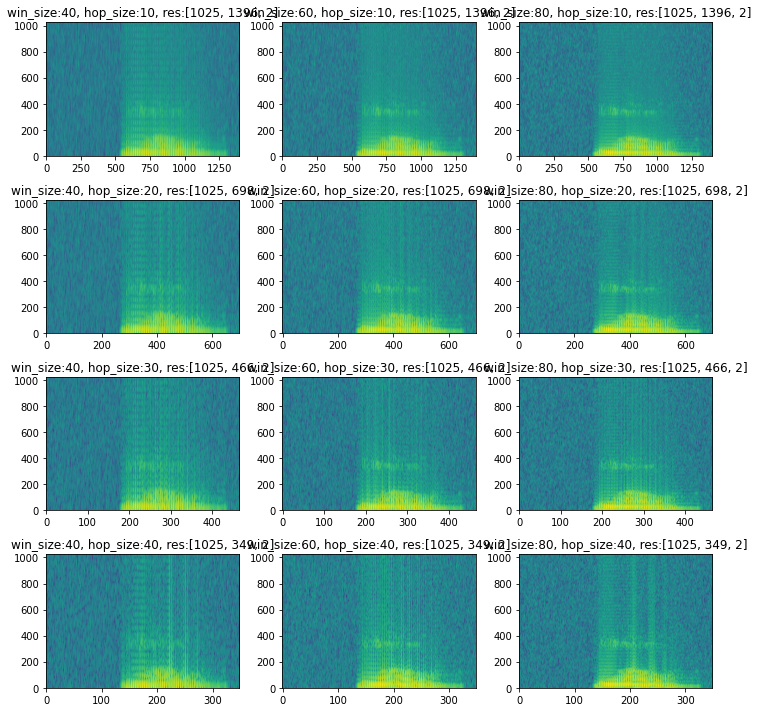

In [20]:
fig=plt.figure(figsize=(10,10))
axes = []
cols = 3
rows = 4

ft_extr_params_list = [(10, 40), (10, 60), (10, 80), 
                       (20, 40), (20, 60), (20, 80),
                       (30, 40), (30, 60), (30, 80),
                       (40, 40), (40, 60), (40, 80)]

"""[(10, 5), (10, 10),
                        (20, 5), (20, 10), (20,20),
                      (40, 5), (40, 10), (40, 20)]"""

for i, (hop_size, win_size) in enumerate(ft_extr_params_list):
    print("win_size %i, hop_size %i" % (win_size, hop_size))
    
    # window_stride_ms = win_size/2
    # win_length = int(sample_rate * win_size / 1000)
    # hop_length = int(sample_rate * hop_size / 1000)
    win_length = win_size
    hop_length = hop_size
    n_fft = 2048

    print("win_length %i, hop_length %i" % (win_length, hop_length))
    stft_sample = torch.stft(sample, n_fft=n_fft, hop_length=hop_length, win_length=win_length, center=False)
    title = "win_size:%i, hop_size:%i, res:%s" % (win_size, hop_size, str(list(stft_sample.shape)))

    out_real = stft_sample[ :, :, 0]
    out_imag = stft_sample[ :, :, 1]

    stft_sample = torch.abs(out_real**2 + out_imag**2)
    axes.append( fig.add_subplot(rows, cols, i+1) )
    axes[-1].set_title(title)  
    
    plt.imshow(librosa.power_to_db(stft_sample), origin="lower", aspect="auto")
    

    
    # plt.imshow(out_abs, origin="lower", aspect="auto")

    # plt.pcolormesh(out_abs)
    

plt.tight_layout()
plt.show()
    

n_fft 640, win_size 10
win_length 160, hop_length 80
n_fft 400, win_size 40
win_length 640, hop_length 320


RuntimeError: stft(torch.FloatTensor[16400], n_fft=400, hop_length=320, win_length=640, window=None, normalized=0, onesided=None, return_complex=None) : expected 0 < win_length <= n_fft, but got win_length=640

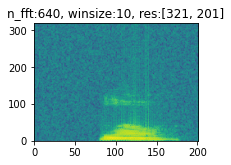

In [23]:
fig=plt.figure(figsize=(10,10))
axes = []
cols = 3
rows = 4

ft_extr_params_list = [(640, 10), (400, 40), (400, 60),
                       (2048, 10), (2048, 40), (2048, 60)]

for i, (n_fft, win_size) in enumerate(ft_extr_params_list):
    print("n_fft %i, win_size %i" % (n_fft, win_size))
    window_stride_ms = win_size/2
    win_length = int(sample_rate * win_size / 1000)
    hop_length = int(sample_rate * window_stride_ms / 1000)
    print("win_length %i, hop_length %i" % (win_length, hop_length))
    stft_sample = torch.stft(sample, n_fft=n_fft, hop_length=hop_length, win_length=win_length)
    
    out_real = stft_sample[ :, :, 0]
    out_imag = stft_sample[ :, :, 1]
    stft_sample = np.abs(out_real **2 + out_imag**2)
    title = "n_fft:%i, winsize:%i, res:%s" % (n_fft, win_size, str(list(stft_sample.shape)))

    axes.append( fig.add_subplot(rows, cols, i+1) )
    axes[-1].set_title(title)  
    
    plt.imshow(librosa.power_to_db(stft_sample), origin="lower", aspect="auto")
    
    
    
    # plt.imshow(stft_sample, origin="lower", aspect="auto")

    # plt.pcolormesh(out_abs)
    # plt.specgram(stft_sample, cmap="grey", Fs=16000)
    

plt.tight_layout()
plt.show()
    